In [28]:
import pandas as pd
df = pd.read_csv(r'C:\\narod_without_html.csv', encoding='utf-8')

In [67]:
import re
def cleaned_text(text):
    cleaned_from_n = re.sub('[\n]+', ' ', text)
    cleaned_from_x = re.sub('\xa0', ' ', cleaned_from_n)
    cleaned_from_pocht = re.sub('[a-zA-Z]+@[a-zA-Z]+|&#769;|[XVI]+', '', cleaned_from_x)
    cleaned_from_web = re.sub('[a-zA-Z]+://[a-zA-Z\.\-\//?=\d&;]+[a-zA-Z\.\-\/?=\d&]*|://[a-zA-Z\.\-\//?=\d&;]+[a-zA-Z\.\-\/?=\d&]*|www[a-zA-Z.-/?=\d]+|<[/a-zA-Z\->"\.///:_/=\d\s]+/>|<[/a-zA-Z\->"\.///:_/=\d\s]+>|<[a-zA-Z]+|[a-zA-Z]+="[a-zA-Z-\d\/#&;=]+|[_a-zA-Z\d-]"|/[\d]+|[/>]|[\d]{2}:[\d]{2}:[\d]{2}|_[a-zA-Z]+_[a-zA-Z]+_[a-zA-Z]+_[a-zA-Z]+_[a-zA-Z]+|_[a-zA-Z]+_[a-zA-Z]+_[a-zA-Z]+_[a-zA-Z]+|-\d+-\d+-\d+', '', cleaned_from_pocht)
    added_spaces = re.sub('([а-яА-ЯёЁ])([!?:;»"\.\(\),])([а-яА-ЯёЁ])', r'\1\2 \3', cleaned_from_web)
    added_spaces_1 = re.sub('([а-яА-ЯёЁ])([«“])([а-яА-ЯёЁ])', r'\1 \2\3', added_spaces)
    added_spaces_2 = re.sub('([а-яА-ЯёЁ])([—])([а-яА-ЯёЁ])', r'\1 \2\3', added_spaces_1)
    cleaned_from_spaces = re.sub('[\s]{2,}', ' ', added_spaces_2).strip()

    return cleaned_from_spaces

In [68]:
df['page_text'] = df['page_text'].fillna("Не указано")

In [69]:
df['page_text'] = df['page_text'].apply(cleaned_text)

In [26]:
import json
with open(r'C:\Users\79103\Downloads\emoticon_dict.json', 'r') as file:
    data = json.load(file)

In [27]:
data

{'( ˘͈ ᵕ ˘͈♡)': {'original_tags': ['kissed face', 'popular', 'love'],
  'new_tags': ['blush', 'heart', 'kiss', 'smiling']},
 '(╥﹏╥)': {'original_tags': ['stupid ass memory leak',
   'popular',
   'sad',
   'sobbing'],
  'new_tags': ['sad', 'crying']},
 '（＾ω＾）': {'original_tags': ['happy', 'blush', 'Good Day #4', 'popular'],
  'new_tags': ['blush']},
 '(◍•ᴗ•◍)♡ ✧*。': {'original_tags': ['Giving Love', 'popular', 'love'],
  'new_tags': ['heart', 'smiling']},
 '⸜( ˙˘˙)⸝': {'original_tags': ['happy', 'popular', 'love'], 'new_tags': []},
 '♡´･ᴗ･`♡': {'original_tags': ['heart', 'popular', 'love', 'In Love #7'],
  'new_tags': ['heart', 'smiling']},
 '(｡•́︿•̀｡)': {'original_tags': ['So bad', 'popular', 'sad'],
  'new_tags': ['sad']},
 '(⋈◍＞◡＜◍)。✧♡': {'original_tags': ['popular',
   'love',
   'Happy Face Thinking Of Love'],
  'new_tags': ['heart', 'smiling']},
 '(づ◡﹏◡)づ': {'original_tags': ['Hug me #8', 'popular', 'sad'],
  'new_tags': ['sad', 'hug']},
 '(≧◡≦)': {'original_tags': ['happy', 'Sch

In [30]:
smiles_df = pd.DataFrame({
    'smile': list(data.keys())
})

print(smiles_df)

                    smile
0             ( ˘͈ ᵕ ˘͈♡)
1                   (╥﹏╥)
2                   （＾ω＾）
3            (◍•ᴗ•◍)♡ ✧*。
4                ⸜( ˙˘˙)⸝
...                   ...
62144  ヽ(^o^)ρ┳┻┳°σ(^o^)/
62145       ┬─┬﻿ ノ( ゜-゜ノ)
62146              (;-_-)
62147             (ﾉ^_^)ﾉ
62148         ~=[,,_,,]:3

[62149 rows x 1 columns]


In [31]:
smiles_list = list(data.keys())

In [33]:
from tqdm import tqdm
tqdm.pandas()

def find_smiles(text):
    found_smiles = []
    for smile in smiles_list:
        if smile in text:
            found_smiles.append(smile)
    return found_smiles if found_smiles else None

df['found_smiles'] = df['page_text'].progress_apply(find_smiles)

result_df = df[df['found_smiles'].notna()]
print(result_df[['page_text', 'found_smiles']])

100%|██████████| 42069/42069 [2:53:25<00:00,  4.04it/s]      


                                               page_text  \
0      \n\nШахматы\n\nШахматы\n\nРГСУ\n\nwww.chess-on...   
7      \n\nШансон Портал скачать бесплатно и без реги...   
8      \n\nМихаил Круг - Кольщик (Видео) Online - 9 Ф...   
10     \n\nЯнварь 2014 - Новости сайта - Шансон Порта...   
20     \n\nСтас Михайлов - Спаси меня (Видео) Online ...   
...                                                  ...   
42030  \n\nПерсональный сайт - 31.07.11\n\n  .\n\n. \...   
42032  \n\nПерсональный сайт - 23-07-11\n\n  .\n\n. \...   
42049  \n\nПерсональный сайт - Ислам в Нижегородской ...   
42050  \n\nПерсональный сайт - Иудаизм в Нижегородско...   
42051  \n\nПерсональный сайт - Буддизм в Нижегородско...   

                found_smiles  
0                       [:/]  
7      [:3, :/, o_o, ><, o/]  
8                   [:/, xp]  
10                      [:3]  
20                      [:3]  
...                      ...  
42030                   [:/]  
42032                   [:/]  


In [59]:
list_of_smiles = []
for i in result_df['found_smiles']:
    for o in i:
        if o not in list_of_smiles:
            list_of_smiles.append(o)

In [230]:
elements_to_remove = {'QQ', '(:(', '=U', '=[', 'o:)', ':)]', '=o', 'Cx', '£)', '>:-)', '3:)', ':L', 'PS)', 'D8', ':-9', ':d', '=W', 'oR', '©)', '¦.', '8D', ':E', '=?', ':]', 'b (', ': )', 'Ü', 'X(', 'O:)', 'qq', '(a)', '8)', 'D=', ': (', 'xp', 'o/', '*)', 't)', '=0', '%)', 'orz', 'c:', 'STO', '0:3', '0=)', '$-', 'OTZ', '^^^^', 'OTL', '®)', 'X[', '--"', ';;', 'X3' "<3", "òó", ":|", "(;", "O.O", "C:", ":C", ":?", ";]", 
    ":o", ":b", "T-T", ";3", ":c", "e_e", "o7", ".-.", 
    ":S", "$_$", ":*", "^^", ":[", "BD", "D:", "=p", 
    "d:", "ت", "x.x", "x3", ":<", "=3", ":F", "o_o", 
    ":3", ":\"D", "ϡ", "=O", "x-D", "T.T", ":s", ":u", 
    "D;", ":')", ":#", ":v", "uwu", "=L", "oO", ":p", ":P", '<3', 'DX', 'o_0', '$(', ':/', '=]', '><', 'X3', ':$', ':&', '$('}
filtered_list = [x for x in list_of_smiles if x not in elements_to_remove]
filtered_list.extend(["$(", '://', "=((((((((", "=(((((((", "=((((((", "=(((((", "=((((", "=(((", "=((", ":))))))", ":)))))))", ":))))))))", ":)))))", ":))))", ":)))", ":))", "xD)", "xDDDDDDDDDD", "xDDDDDDDDD", "xDDDDDDDD", "xDDDDDDD", "xDDDDDD", "xDDDDD", "xDDDD", "xDDD", "xDD", ":-)))))))))))", ":-))))))))))", ":-)))))))))", ":-))))))))", ":-)))))))", ":-))))))", ":-)))))", ":-))))", ":-)))", ":-))", ";)))", ";))", ";-))", ":-);):D", ":(((", ":((", ":()))", ";-)))", ";-))", ":):):):):)", ":):):):)", ":):):)", ":):)"])
filtered_list

[':)',
 '):',
 '=)',
 ':-)',
 ':-(',
 ':>',
 ';-)',
 ':))',
 ':)))',
 '(0-0)',
 ':(',
 ';(',
 '>.<',
 ':\\',
 ':D',
 'XP',
 ';)',
 ':-))',
 ':-) ,',
 '=(',
 '8-)',
 ':*)',
 '=D',
 ':")',
 '>.>',
 '8*)',
 ':-)))))))',
 ':-) .',
 'x_x',
 '^_^',
 'xD',
 'XD',
 '=\\',
 '+_+',
 ':-*',
 '>_<',
 'O_O',
 '=/',
 ';D',
 '(^_^)',
 '♥.',
 ":'(",
 ':->',
 'D:D',
 ':X',
 ':-P',
 '8====D',
 ';>',
 '>;)',
 '(:',
 '☺',
 '^.^',
 '=^.^=',
 '$(',
 '://',
 '=((((((((',
 '=(((((((',
 '=((((((',
 '=(((((',
 '=((((',
 '=(((',
 '=((',
 ':))))))',
 ':)))))))',
 ':))))))))',
 ':)))))',
 ':))))',
 ':)))',
 ':))',
 'xD)',
 'xDDDDDDDDDD',
 'xDDDDDDDDD',
 'xDDDDDDDD',
 'xDDDDDDD',
 'xDDDDDD',
 'xDDDDD',
 'xDDDD',
 'xDDD',
 'xDD',
 ':-)))))))))))',
 ':-))))))))))',
 ':-)))))))))',
 ':-))))))))',
 ':-)))))))',
 ':-))))))',
 ':-)))))',
 ':-))))',
 ':-)))',
 ':-))',
 ';)))',
 ';))',
 ';-))',
 ':-);):D',
 ':(((',
 ':((',
 ':()))',
 ';-)))',
 ';-))',
 ':):):):):)',
 ':):):):)',
 ':):):)',
 ':):)']

In [187]:
def clean(text):
    cleaned_from_z = re.sub(r':3\w+', ' ', text)
    cleaned_from_sk = re.sub(r'\(.{0,150}\):\s*«*"*|[a-z]+:D[a-z]+|;\(.{0,150}\)|:\(.{0,150}\)|[a-zA-Z]+\s*:\\{1,4}\s*[a-zA-Z]+', ' ', cleaned_from_z)
    return cleaned_from_sk

In [183]:
df['page_text'] = df['page_text'].apply(clean)

In [231]:
from tqdm import tqdm
tqdm.pandas()

def find_smiles(text):
    if not isinstance(text, str):
        return []
    
    found_smiles = []
    for smile in filtered_list:
        count = text.count(smile) 
        if count > 0:
            found_smiles.extend([smile] * count) 
    return found_smiles 


df['smiles'] = df['page_text'].progress_apply(find_smiles)


result_df = df[df['smiles'].str.len() > 0]  
print(result_df[['page_text', 'smiles']])

100%|██████████| 42069/42069 [00:14<00:00, 2808.55it/s]

                                               page_text  \
83     Персональный сайт - головна главная головна гл...   
84     Персональный сайт - наша музика наша музыка го...   
85     Персональный сайт - відео видео mass media Шум...   
86     Персональный сайт - фотогалерея головна главна...   
87     Персональный сайт - райдер головна главная наш...   
...                                                  ...   
41930  Где покататься? Где покататься? ДСС — Это ДК "...   
41931  Трюки на скейте. Трюки на скейте. Оllie (олли)...   
41938  ПУТИН и Орден Люцифера ПУТИН и Орден Люцифера ...   
41939  Вступление (краткий конспект из различных исто...   
41962  Гл.5: ЭКОНОМИЧЕСКОЕ ЧУДО Глава : ЭКОНОМИЧЕСКОЕ...   

                                 smiles  
83                     [:), :), :), :)]  
84                             [:), :)]  
85                             [:), :)]  
86                             [:), :)]  
87                             [:), :)]  
...                        

In [211]:
import re

for sm in filtered_list:
    pattern = re.escape(sm)
    regex_pattern = f'.{{0,100}}{pattern}.{{0,10}}'
    
    for idx, row in result_df.iterrows():
        if 'smiles' not in row:
            continue
            
        text = str(row['smiles'])
        
        matches = re.findall(regex_pattern, text)
        if matches:
            print(f"Смайл: {sm} | ID: {idx} | Совпадения: {matches}")

Смайл: :) | ID: 83 | Совпадения: ["[':)', ':)', ':)', ':)']"]
Смайл: :) | ID: 84 | Совпадения: ["[':)', ':)']"]
Смайл: :) | ID: 85 | Совпадения: ["[':)', ':)']"]
Смайл: :) | ID: 86 | Совпадения: ["[':)', ':)']"]
Смайл: :) | ID: 87 | Совпадения: ["[':)', ':)']"]
Смайл: :) | ID: 88 | Совпадения: ["[':)', ':)']"]
Смайл: :) | ID: 89 | Совпадения: ["[':)', ':)']"]
Смайл: :) | ID: 90 | Совпадения: ["[':)', ':)']"]
Смайл: :) | ID: 91 | Совпадения: ["[':)', ':)']"]
Смайл: :) | ID: 201 | Совпадения: ["[':)']"]
Смайл: :) | ID: 221 | Совпадения: ["[':)']"]
Смайл: :) | ID: 224 | Совпадения: ["[':)']"]
Смайл: :) | ID: 228 | Совпадения: ["[':)']"]
Смайл: :) | ID: 265 | Совпадения: ["[':)']"]
Смайл: :) | ID: 266 | Совпадения: ["[':)']"]
Смайл: :) | ID: 5765 | Совпадения: ["[':)', ':)']"]
Смайл: :) | ID: 5766 | Совпадения: ["[':)', ':)']"]
Смайл: :) | ID: 6096 | Совпадения: ["[':)']"]
Смайл: :) | ID: 6098 | Совпадения: ["[':)']"]
Смайл: :) | ID: 6542 | Совпадения: ["[':)']"]
Смайл: :) | ID: 6543 | Сов

In [258]:
result_df['smiles'] = [
    smiles if len(smiles) > 0 else []
    for smiles in result_df['smiles']
]

In [266]:
df_exploded = result_df.explode('smiles')

In [267]:
df_exploded

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,page_id,site_id,page_link,page_parent,page_title,page_text,topic,found_smiles,smiles
83,83,83,83,4592,47,http://chermnaya-ladiya.narod.ru/,4592,Персональный сайт - головна / главная,Персональный сайт - головна главная головна гл...,Музыка,[:)],:)
83,83,83,83,4592,47,http://chermnaya-ladiya.narod.ru/,4592,Персональный сайт - головна / главная,Персональный сайт - головна главная головна гл...,Музыка,[:)],:)
83,83,83,83,4592,47,http://chermnaya-ladiya.narod.ru/,4592,Персональный сайт - головна / главная,Персональный сайт - головна главная головна гл...,Музыка,[:)],:)
83,83,83,83,4592,47,http://chermnaya-ladiya.narod.ru/,4592,Персональный сайт - головна / главная,Персональный сайт - головна главная головна гл...,Музыка,[:)],:)
84,84,84,84,4593,47,http://chermnaya-ladiya.narod.ru/index/0-2,4592,Персональный сайт - наша музика / наша музыка,Персональный сайт - наша музика наша музыка го...,Музыка,[:)],:)
...,...,...,...,...,...,...,...,...,...,...,...,...
41931,41931,41931,101393710,397946,9856,http://dmx-ik.narod.ru/p6.htm,397945,Трюки на скейте.,Трюки на скейте. Трюки на скейте. Оllie (олли)...,Музыка,"[:), ;), :-)]",;))
41938,41938,41938,101393717,398814,9879,http://sagarome.narod.ru/Putin.htm,398813,ПУТИН и Орден Люцифера,ПУТИН и Орден Люцифера ПУТИН и Орден Люцифера ...,Литература,"[:/, x3, =(]",=(
41939,41939,41939,101393718,398815,9879,http://sagarome.narod.ru/SunZentrVst.htm,398813,Вступление (краткий конспект из различных ...,Вступление (краткий конспект из различных исто...,Литература,"[:/, =(, o/]",=(
41962,41962,41962,101393741,398838,9879,http://sagarome.narod.ru/05.htm,398813,Гл.5: ЭКОНОМИЧЕСКОЕ ЧУДО,Гл.5: ЭКОНОМИЧЕСКОЕ ЧУДО Глава : ЭКОНОМИЧЕСКОЕ...,Литература,"[8), %), ):]",$(


In [232]:
for idx, row in result_df.iterrows():
    smiles = row['smiles']
    if len(smiles) > 0:
        print(idx, smiles)

83 [':)', ':)', ':)', ':)']
84 [':)', ':)']
85 [':)', ':)']
86 [':)', ':)']
87 [':)', ':)']
88 [':)', ':)']
89 [':)', ':)']
90 [':)', ':)']
91 [':)', ':)']
201 [':)']
221 [':)']
224 [':)']
228 [':)']
265 [':)']
266 [':)']
288 ['):']
434 ['=)']
437 ['=)']
5759 [':-)', ':-(']
5760 [':-)', ':-)']
5765 [':)', ':)']
5766 [':)', ':)']
5814 [':-)']
5822 ['=)', '=)', '=)']
5831 ['=)']
6096 [':)']
6098 [':)']
6542 [':)']
6543 [':)']
6545 [':)']
6548 [':)']
6556 [':)']
6557 [':)']
6586 [':)']
6588 [':)']
6627 [':)']
6884 [':)']
6932 [':)']
6934 [':)']
6935 [':)']
6945 [';-)']
6948 [':)', ';-)']
6961 [':)', ':)', ':)', ':)', ':))', ':))', ':)))', ':))))', ':)))', ':))', ':))']
6964 [':)', ':)']
6970 ['(0-0)']
7394 [':)']
7669 [':)', ':)']
7670 [':)', ':)']
7734 [':\\']
7802 [':D', ':D', ':D']
7871 ['=)', ':\\']
7878 ['=)']
7879 ['=)']
7881 ['=)']
7888 ['=)']
7889 ['=)', ':\\']
7896 [':)', ':))', ':)))', ':)))', ':))']
7956 [':)', ':)']
7957 [':)']
7958 [':)']
7959 [':)', ':)', ':))', ';)', ':))']

In [234]:
from collections import Counter
import pandas as pd

all_smiles = []
for idx, row in result_df.iterrows():
    smiles = row['smiles']
    if len(smiles) > 0:
        all_smiles.extend(smiles)

smiles_counter = Counter(all_smiles)

print("Топ-40:")
top = smiles_counter.most_common(40)
for smile, count in top:
    print(f"{smile}: {count} раз")

print("\nУникальные кадры:")
unique_smiles = [(smile, count) for smile, count in smiles_counter.items() if count == 1]
for smile, count in unique_smiles:
    print(f"{smile}: {count} раз")



Топ-40:
:): 1705 раз
=): 583 раз
:)): 430 раз
:-): 339 раз
;): 214 раз
:))): 206 раз
☺: 141 раз
):: 94 раз
:(: 64 раз
;-): 61 раз
:-)): 58 раз
=(: 56 раз
:D: 52 раз
:-) .: 40 раз
:-(: 36 раз
xD: 27 раз
;)): 26 раз
:):): 26 раз
^_^: 20 раз
=((: 19 раз
:):):): 17 раз
=(((: 15 раз
xDD: 12 раз
:\: 11 раз
;))): 11 раз
:((: 10 раз
=D: 9 раз
:-))): 9 раз
;-)): 8 раз
xDDD: 8 раз
:(((: 7 раз
=((((: 6 раз
:):):):): 6 раз
:)))): 5 раз
8-): 5 раз
=\: 5 раз
$(: 4 раз
xDDDD: 4 раз
:-*: 4 раз
:))))): 3 раз

Уникальные кадры:
(0-0): 1 раз
8*): 1 раз
:)))))): 1 раз
:))))))): 1 раз
:)))))))): 1 раз
:-))))))))))): 1 раз
:-)))))))))): 1 раз
:-))))))))): 1 раз
:-)))))))): 1 раз
+_+: 1 раз
O_O: 1 раз
:'(: 1 раз
xDDDDDDDDDD: 1 раз
xDDDDDDDDD: 1 раз
xDDDDDDDD: 1 раз
xDDDDDDD: 1 раз
xDDDDDD: 1 раз
:-);):D: 1 раз
:-P: 1 раз
xD): 1 раз
;-))): 1 раз
8====D: 1 раз
^.^: 1 раз
=^.^=: 1 раз


In [274]:
import pandas as pd

all_smiles = []
for index, row in result_df.iterrows(): 
    topic = row['topic']  
    for smile in row['smiles']: 
        all_smiles.append({'topic': topic, 'smile': smile})

smiles_df = pd.DataFrame(all_smiles)

result = smiles_df.groupby(['topic', 'smile']).size().reset_index(name='count')

result_sorted = result.sort_values(['topic', 'count'], ascending=[True, False])

top_smiles = result_sorted.groupby('topic').head(5)

print(top_smiles)

          topic  smile  count
6       История     :)    317
27      История     =)    123
10      История    :-)     90
7       История    :))     84
11      История  :-) .     40
39   Литература     :)    940
80   Литература     =)    370
40   Литература    :))    276
53   Литература    :-)    198
41   Литература   :)))    146
104      Музыка     :)    317
125      Музыка     =)     80
105      Музыка    :))     44
118      Музыка     ;)     30
112      Музыка    :-)     24
150     Питомцы      ☺    141
134     Питомцы     :)    131
139     Питомцы    :-)     27
135     Питомцы    :))     26
136     Питомцы   :)))     12


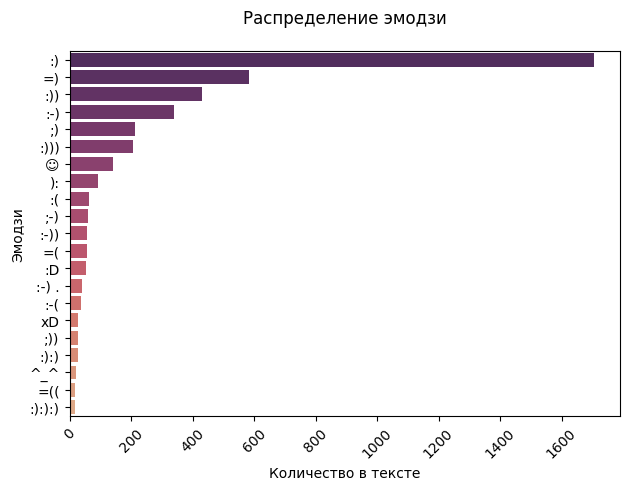

In [253]:
import matplotlib.pyplot as plt
import seaborn
df = pd.DataFrame(
    smiles_counter.items(),
    columns=['smile', 'count']
)
df = df[df['count'] > 15]
df = df.sort_values('count', ascending=False)

seaborn.barplot(
    data = df,
    x='count',
    y='smile',
    hue='smile',
    palette='flare_r',
    legend=False
  )

plt.title('Распределение эмодзи', pad=20)
plt.xlabel('Количество в тексте')
plt.ylabel('Эмодзи')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
